# Homework Data Visualization

Dataset:
[https://www.kaggle.com/blastchar/telco-customer-churn#WA_Fn-UseC_-Telco-Customer-Churn.csv]

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# please import as much as you need|

In [4]:
# read your data

df = pd.read_csv('telco.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 1. Dalam rata-rata, payment method mana yang memiliki monthly charge terbesar per customernya?

Hint: Gunakan groupby payment method terhadap monthly charge dengan aggregate function rata-rata

<Axes: xlabel='PaymentMethod'>

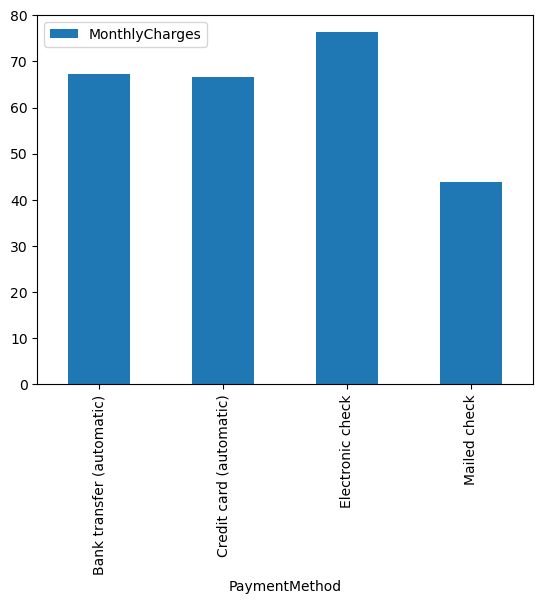

In [5]:
df2=df.groupby('PaymentMethod')['MonthlyCharges'].mean().reset_index()
# mungkin ini bisa diganti dari variable df2 menjadi variable average_monthly_charge, 
#usahakan penamaan variabel mewakili saat sedang melakukan sesuatu
df2.plot(x='PaymentMethod',y='MonthlyCharges',kind='bar')

In [6]:
# Menghitung rata-rata monthly charge per customer untuk setiap payment method
average_monthly_charge = df.groupby('PaymentMethod')['MonthlyCharges'].mean()

# Mengidentifikasi payment method dengan rata-rata monthly charge terbesar
payment_method_max_charge = average_monthly_charge.idxmax()
max_charge = average_monthly_charge.max()

# Menampilkan hasil
print("Payment method dengan monthly charge terbesar per customernya adalah:", payment_method_max_charge)
print("Rata-rata monthly charge terbesar:", max_charge)

Payment method dengan monthly charge terbesar per customernya adalah: Electronic check
Rata-rata monthly charge terbesar: 76.25581395348837


<Axes: xlabel='PaymentMethod'>

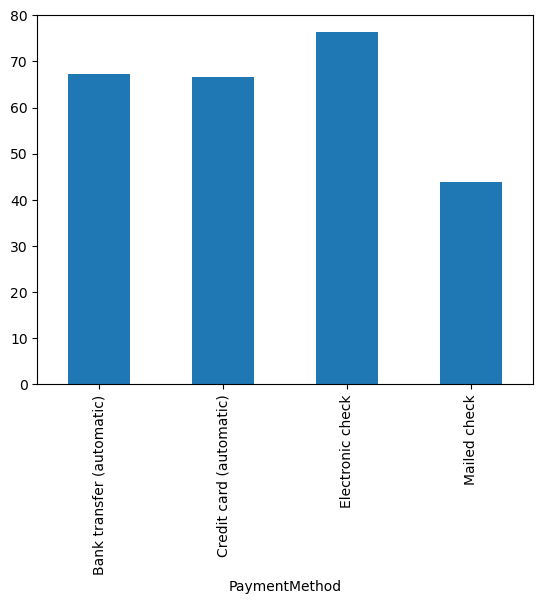

In [7]:
average_monthly_charge.plot(x='PaymentMethod',y='MonthlyCharges',kind='bar')

Jadi, dari plot di atas, dapat disimpulkan bahwa payment electronic check lah yang memiliki hasil tertinggi, dan yang terendah adalah mailed check

## 2. Bagaimana jumlah customer dilihat dari tenure group?
### Lebih baik menggunakan df['tenure'].max() dari pada 100, barang kali ternyata ada case baru yang tenurnya melebihi 100 hari. Tetapi, biasanya diberi tahu jika ada case baru lagi yang melebihi 100 hari.

Tenure group:
- low_tenure: User dengan tenure < 21 hari
- medium_tenure: User dengan tenure 21 - 40 hari
- high_tenure: User dengan tenure > 40 hari

Hint:
- Memotong data integer menjadi group categorical dapat menggunakan beberapa macam cara, contohnya dengan numpy.where atau pandas.cut
- Mirip dengan plot pertama, namun ini menghitung jumlah unique users

In [8]:
# Menentukan rentang grup tenure
bins = [0, 20, 40, df['tenure'].max()]
labels = ['low_tenure', 'medium_tenure', 'high_tenure']

# Menambahkan kolom baru 'TenureGroup' ke dalam dataset berdasarkan rentang grup tenure
df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)

# Menghitung jumlah customer unik dalam setiap grup tenure
customer_count = df.groupby('TenureGroup')['customerID'].nunique()

# Menampilkan hasil
print(customer_count)

TenureGroup
low_tenure       2807
medium_tenure    1415
high_tenure      2459
Name: customerID, dtype: int64


<Axes: >

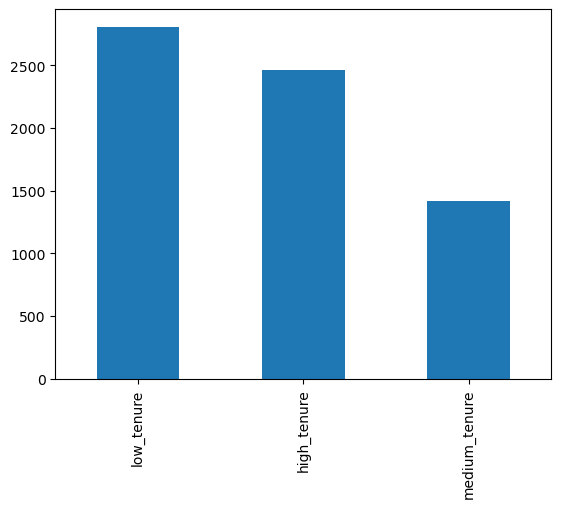

In [9]:
pd.value_counts(df['TenureGroup']).plot.bar()

Jadi, dari plot di atas, kami menyimpulkan bahwa nilai tertinggi adalah user dengan tenure low, dan yang paling rendah adalah user dengan tenure medium

## 3. Apakah kebanyakan dari Senior Citizen berlangganan PhoneService?
### (ada yang salah dari kesimpulan yang dibuat)

Hint:
- Dapat menggunakan feature/input parameter hue pada seaborn
- Dalam menghitung jumlah unique customer, jangan lupa perhatikan angka rasio, tidak hanya angka absolutnya



In [10]:
# Menghitung jumlah unique customer Senior Citizen yang berlangganan dan tidak berlangganan PhoneService
senior_citizen_counts = df.loc[df['SeniorCitizen'] == 1, 'PhoneService'].value_counts()

# Menghitung jumlah unique customer Not Senior Citizen yang berlangganan dan tidak berlangganan PhoneService
not_senior_citizen_counts = df.loc[df['SeniorCitizen'] == 0, 'PhoneService'].value_counts()

# Menampilkan informasi jumlah unique customer Senior Citizen yang berlangganan dan tidak berlangganan PhoneService
print("Jumlah unique customer Senior Citizen yang berlangganan PhoneService:", senior_citizen_counts[1])
print("Jumlah unique customer Senior Citizen yang tidak berlangganan PhoneService:", senior_citizen_counts[0])
print("Jumlah unique customer bukan Senior Citizen yang berlangganan PhoneService:", not_senior_citizen_counts[1])
print("Jumlah unique customer bukan Senior Citizen yang tidak berlangganan PhoneService:", not_senior_citizen_counts[0])

Jumlah unique customer Senior Citizen yang berlangganan PhoneService: 104
Jumlah unique customer Senior Citizen yang tidak berlangganan PhoneService: 1038
Jumlah unique customer bukan Senior Citizen yang berlangganan PhoneService: 578
Jumlah unique customer bukan Senior Citizen yang tidak berlangganan PhoneService: 5323


In [11]:
jml_row = df.shape[0]

In [12]:
senior_citizen_counts_yes_phoneservice = "{:.2f}".format(senior_citizen_counts[1]/jml_row*100)
senior_citizen_counts_no_phoneservice = "{:.2f}".format(senior_citizen_counts[0]/jml_row*100)

In [13]:
# jika ingin di percent
print("Percent customer Senior Citizen yang berlangganan PhoneService:", senior_citizen_counts_yes_phoneservice, "%")
print("Percent customer Senior Citizen yang tidak berlangganan PhoneService:", senior_citizen_counts_no_phoneservice,"%")

Percent customer Senior Citizen yang berlangganan PhoneService: 1.48 %
Percent customer Senior Citizen yang tidak berlangganan PhoneService: 14.74 %


In [14]:
not_senior_citizen_counts_yes_phoneservice = "{:.2f}".format(not_senior_citizen_counts[1]/jml_row*100)
not_senior_citizen_counts_no_phoneservice = "{:.2f}".format(not_senior_citizen_counts[0]/jml_row*100)

In [15]:
print("Percent customer bukan Senior Citizen yang berlangganan PhoneService:", not_senior_citizen_counts_yes_phoneservice, "%")
print("Percent customer bukan Senior Citizen yang tidak berlangganan PhoneService:", not_senior_citizen_counts_no_phoneservice, "%")

Percent customer bukan Senior Citizen yang berlangganan PhoneService: 8.21 %
Percent customer bukan Senior Citizen yang tidak berlangganan PhoneService: 75.58 %


Jadi, dari plot di atas, dapat disimpulkan bahwa baik senior citizen ataupun bukan sebagian besar berlangganan phone service
Dan kita bisa dikatakan, Mayoritas pengguna Phoneservice ini adalah bukan Senior Citizen

## 4. Bagaimana Distribusi dari TotalCharge?

Hint:
- Ubah datatype TotalCharge dari object ke int atau float
- Buat distribusi plot!

In [16]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,low_tenure
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,medium_tenure
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,low_tenure
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,high_tenure
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,low_tenure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,medium_tenure
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,NaN
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,low_tenure
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,low_tenure


In [17]:
# Mengubah tipe data kolom TotalCharge menjadi float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [18]:
# Membuang baris dengan nilai TotalCharge yang tidak valid
df = df.dropna(subset=['TotalCharges'])

Untuk menganalisis distribusi dari TotalCharge, pertama-tama perlu mengubah tipe data kolom TotalCharge dari objek ke tipe data numerik seperti int atau float. Setelah itu, dapat membuat plot distribusi menggunakan library matplotlib atau seaborn. <br>

Berikut adalah contoh kode untuk melakukan hal tersebut:

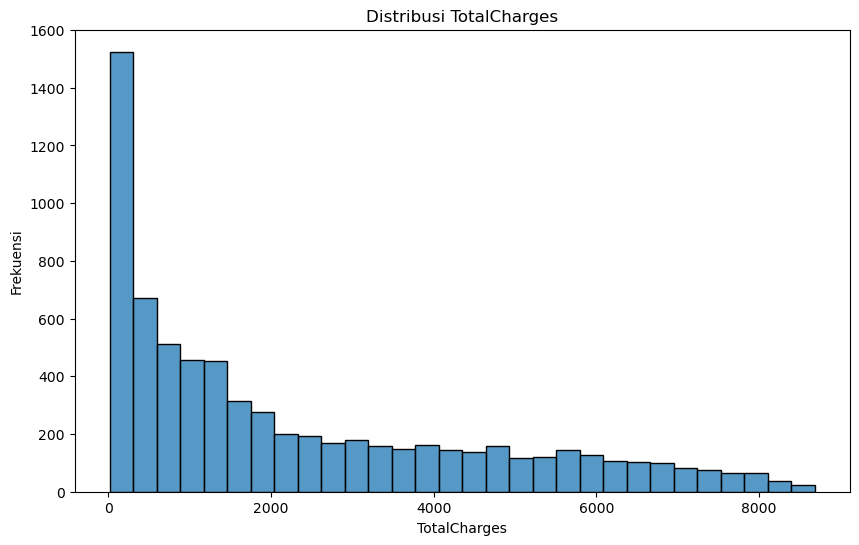

In [21]:
# Membuat plot distribusi TotalCharge
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TotalCharges', bins=30)
plt.title('Distribusi TotalCharges')
plt.xlabel('TotalCharges')
plt.ylabel('Frekuensi')
plt.show()

Dalam contoh kode di atas, kita menggunakan pd.to_numeric() untuk mengubah tipe data kolom TotalCharge menjadi float. Kemudian, menggunakan dropna() untuk membuang baris dengan nilai TotalCharge yang tidak valid (misalnya, jika terdapat nilai yang tidak dapat dikonversi menjadi float). <br>

Selanjutnya, menggunakan sns.histplot() dari library Seaborn untuk membuat plot distribusi TotalCharge. Pada contoh ini, digunakan histogram plot dengan 30 bins. Anda juga dapat menyesuaikan ukuran plot, judul, dan label sumbu sesuai kebutuhan.<br>

Hasilnya akan menampilkan plot distribusi dari TotalCharge, yang akan memberikan informasi tentang sebaran nilai TotalCharge dalam data.

## 5. Apakah customer yang memiliki monthly charges yang tinggi cenderung churn?

Hint: dapat ditunjukan melalui distribusi data <br>
### (hint dengan jawaban yang diberikan tidak sesuai)

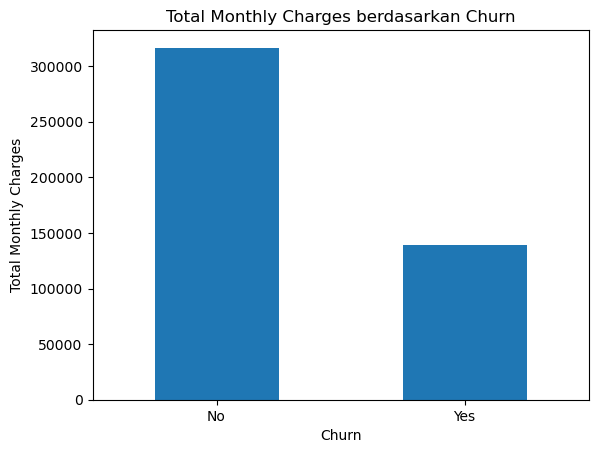

In [23]:
dfgroup = df.groupby(['Churn'])['MonthlyCharges'].sum().reset_index()
dfgroup.plot(x='Churn', y='MonthlyCharges', kind='bar', legend=False)
plt.xlabel('Churn')
plt.ylabel('Total Monthly Charges')
plt.title('Total Monthly Charges berdasarkan Churn')
plt.xticks(rotation=0)
plt.show()

### Maka ini adalah Jawaban yang benar
Untuk mengetahui apakah customer yang memiliki monthly charges yang tinggi cenderung churn, Anda dapat menggunakan analisis distribusi data dengan membandingkan distribusi monthly charges antara customer yang churn dan tidak churn.
<br><br>
Berikut adalah contoh kode untuk melakukan analisis tersebut menggunakan histogram plot:

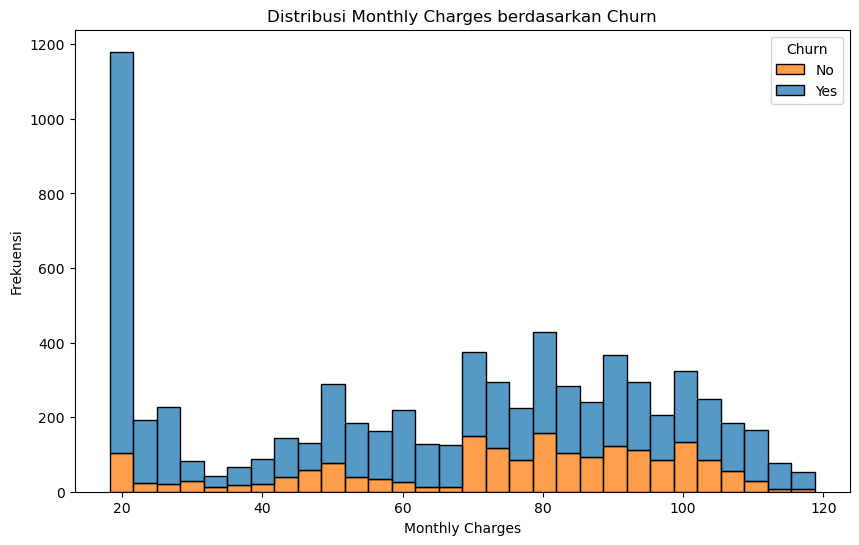

In [24]:
# Membuat plot distribusi monthly charges untuk customer churn dan tidak churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', bins=30)
plt.title('Distribusi Monthly Charges berdasarkan Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Frekuensi')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

Dalam contoh kode di atas, kita menggunakan sns.histplot() dari library Seaborn untuk membuat histogram plot yang membandingkan distribusi monthly charges antara customer churn (Churn=Yes) dan tidak churn (Churn=No). Plot ini menunjukkan distribusi frekuensi monthly charges untuk setiap kategori churn. <br><br>

Apabila terdapat perbedaan yang signifikan dalam distribusi monthly charges antara customer churn dan tidak churn, dapat diasumsikan bahwa customer dengan monthly charges yang tinggi cenderung lebih cenderung untuk churn. Anda dapat melihat perbedaan dalam pola distribusi dan frekuensi antara dua kategori churn pada plot tersebut.
### Penjelasannya Sampai sini

## 6. Bagaimana pengaruh memiliki partner & dependents terhadap tingkat churn customer?

Hint: concat partner dan dependents, gunakan parameter 'hue' pada seaborn untuk mempermudah

C:\Users\Yoel\AppData\Local\Temp\ipykernel_11072\1836660083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Family'] = df['Partner'] + "_" + df['Dependents']


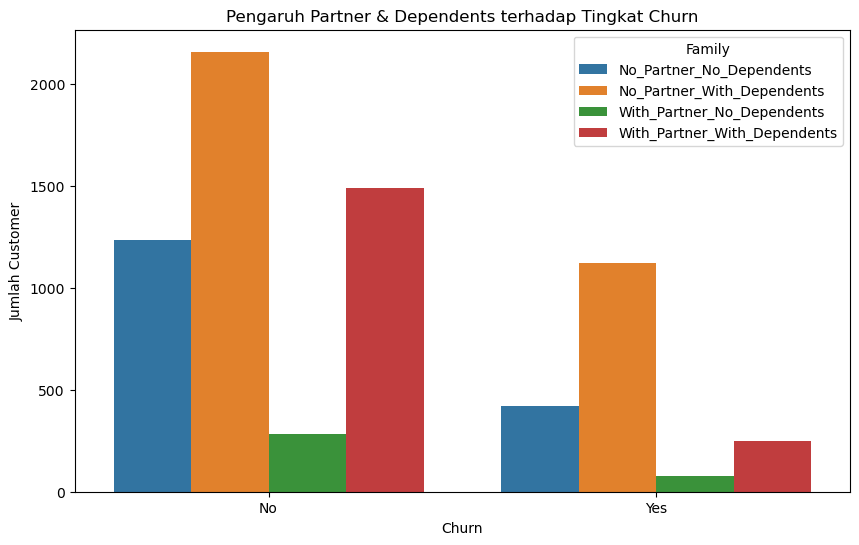

In [27]:
# Menggabungkan kolom Partner dan Dependents menjadi satu kolom baru yaitu Family
df['Family'] = df['Partner'] + "_" + df['Dependents']

# Membuat plot bar dengan hue berdasarkan kolom Family untuk melihat pengaruh terhadap tingkat churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', hue='Family', data=df)
plt.title('Pengaruh Partner & Dependents terhadap Tingkat Churn')
plt.xlabel('Churn')
plt.ylabel('Jumlah Customer')
plt.legend(title='Family', labels=['No_Partner_No_Dependents', 'No_Partner_With_Dependents', 'With_Partner_No_Dependents', 'With_Partner_With_Dependents'])
plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa untuk kategori manapun tingkat untuk tidak churn selalu lebih tinggi dibandingkan yang churn, sehingga menurut saya partner dan dependent tidak terlalu mempengaruhi

Dalam contoh kode di atas, kita menggabungkan kolom Partner dan Dependents menjadi satu kolom baru yang disebut Family menggunakan operator concatenation (+). Kemudian, menggunakan sns.countplot() dari library Seaborn untuk membuat plot bar yang membandingkan tingkat churn berdasarkan kolom Family. Parameter 'hue' digunakan untuk membedakan kategori kombinasi dari partner dan dependents.<br>

Plot ini akan menampilkan jumlah customer untuk setiap kategori kombinasi partner dan dependents, terbagi berdasarkan tingkat churn (Churn=Yes atau Churn=No). Anda dapat melihat perbedaan dalam pola jumlah customer pada setiap kombinasi partner dan dependents, dan melihat pengaruhnya terhadap tingkat churn. Legenda pada plot akan memberikan informasi tentang kombinasi partner dan dependents yang ditampilkan.

## 7. Buatlah satu insight dari data telco customer, dan sertakan storyline pada visualisasi tersebut! dengan hanya memanfaatkan atribut PaymentMethod, CustomerID, dan Churn!

Insight dari data Telco Customer: <br>

Dengan memanfaatkan atribut PaymentMethod, CustomerID, dan Churn, kita dapat mengungkap sebuah insight yang berkaitan dengan kecenderungan churn customer berdasarkan metode pembayaran yang mereka gunakan.<br><br>

Storyline Visualisasi:<br>
Dalam visualisasi berikut, kami menganalisis kecenderungan churn customer berdasarkan metode pembayaran yang mereka gunakan. Kami ingin melihat apakah terdapat perbedaan signifikan dalam tingkat churn antara metode pembayaran yang berbeda.<br>

Insight:<br>
Dalam dataset Telco Customer, terdapat beberapa metode pembayaran yang digunakan oleh customer, seperti 'Electronic check', 'Mailed check', 'Bank transfer (automatic)', dan 'Credit card (automatic)'.<br>

Dalam visualisasi berikut, kami menggunakan stacked bar plot untuk membandingkan jumlah customer churn dan tidak churn untuk setiap metode pembayaran. Kami melihat bahwa metode pembayaran 'Electronic check' memiliki tingkat churn yang jauh lebih tinggi dibandingkan dengan metode pembayaran lainnya. Metode pembayaran 'Mailed check' dan 'Bank transfer (automatic)' juga memiliki tingkat churn yang lebih tinggi daripada 'Credit card (automatic)'.<br>

Insight ini menunjukkan bahwa metode pembayaran 'Electronic check' mungkin memiliki beberapa masalah yang menyebabkan ketidakpuasan atau kurangnya kepercayaan dari customer, sehingga mereka lebih cenderung untuk beralih atau mengakhiri layanan. Sementara itu, metode pembayaran 'Credit card (automatic)' cenderung memiliki tingkat churn yang lebih rendah, mungkin karena keterhubungannya dengan transaksi otomatis dan stabilitas dalam pembayaran.<br>

Sebagai provider layanan Telco, penting untuk mempertimbangkan pengaruh metode pembayaran terhadap tingkat churn customer. Perusahaan dapat fokus pada meningkatkan pengalaman pelanggan dengan memberikan opsi pembayaran yang lebih stabil, aman, dan mudah digunakan. Langkah-langkah ini dapat membantu mengurangi tingkat churn customer dan meningkatkan retensi pelanggan.

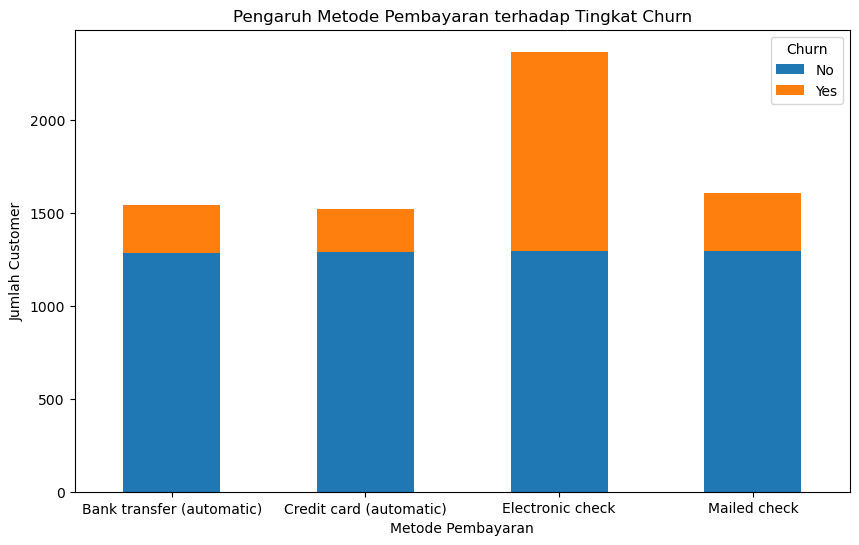

In [30]:
# Menghitung jumlah customer churn dan tidak churn untuk setiap metode pembayaran
churn_counts = df.groupby(['PaymentMethod', 'Churn'])['customerID'].count().unstack()

# Membuat stacked bar plot untuk membandingkan jumlah customer churn dan tidak churn untuk setiap metode pembayaran
churn_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Menambahkan judul dan label sumbu pada plot
plt.title('Pengaruh Metode Pembayaran terhadap Tingkat Churn')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Customer')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.xticks(rotation=0)

# Menampilkan plot
plt.show()